In [184]:
import os
import json
import requests
from pathlib import Path
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import seaborn as sns

%matplotlib inline

In [185]:
csvpath = Path('pandemic_stock_picks.csv')
cramer_picks_data = pd.read_csv(csvpath, infer_datetime_format=True, parse_dates=True)
cramer_picks_data.sort_index()
cramer_picks_data

,AAPL,AAPL.1,AAPL.2,AAPL.3,AAPL.4,AMD,AMD.1,AMD.2,AMD.3,AMD.4,...,WING,WING.1,WING.2,WING.3,WING.4,ZM,ZM.1,ZM.2,ZM.3,ZM.4
0,open,high,low,close,volume,open,high,low,close,volume,...,open,high,low,close,volume,open,high,low,close,volume
1,282.0,290.82,281.23,288.98,51462221,49.46,49.54,46.74,48.6,117513388,...,77.15,80.91,76.44,79.28,1080468,119.65,122.0,107.0,114.33,45566924.0
2,263.75,278.09,263.0,266.09,131779754,43.03,46.34,42.51,43.26,151826804,...,74.18,76.635,74.05,74.76,721617,105.0,116.5,100.88,113.75,13445523.0
3,277.14,286.44,269.37,285.69,65679929,45.41,45.44,43.1,45.38,72130289,...,77.3,78.7,72.635,76.17,422679,113.8,113.8,105.0,108.4858,10004808.0
4,277.39,281.22,271.86,275.3,58216000,44.19,45.97,43.8,45.69,97129692,...,74.16,74.19,70.0,71.57,659010,108.41,113.99,107.0,110.26,12464414.0
5,255.94,270.0,248.0,248.0,96606887,42.0,42.5,39.0,39.005,93019685,...,66.72,69.5,63.92,68.26,1010453,106.0,113.8712,104.39,109.47,11884503.0
6,264.89,279.92,252.95,278.06,83319113,42.2,43.91,39.6,43.9,80640567,...,71.7,72.87,63.69,68.05,828572,113.0,113.8,104.16,107.5,8930120.0
7,241.95,259.08,240.0,241.47,74222204,39.16,43.37,38.51,38.71,79671239,...,61.81,61.98,55.44,57.52,2308884,105.0,119.87,103.2,107.98,33957880.0
8,247.51,257.61,238.4,252.85,151273870,40.19,42.88,38.3,41.88,175214190,...,58.16,65.185,53.55,63.12,1556427,107.33,113.83,102.0,111.04,18418386.0
9,239.77,250.0,237.12,249.0,62337123,39.54,41.95,36.75,39.13,92817298,...,59.9,61.54,44.311,49.71,3075878,111.0,119.0,108.85,118.8002,23847112.0


In [202]:
year_close_data = cramer_picks_data[["AAPL.3", "AMD.3", "AMZN.3", "ATVI.3", "COST.3", "CPB.3", "DPZ.3", "ETSY.3", "FB.3", "GOOG.3", "MKC.3", "NFLX.3", "NVDA.3", "OKTA.3", "PEP.3", "PLD.3", "SHOP.3", "TTWO.3", "WING.3", "ZM.3"]].drop([0,0])
year_close_data.apply(pd.to_numeric, axis=0)

,AAPL.3,AMD.3,AMZN.3,ATVI.3,COST.3,CPB.3,DPZ.3,ETSY.3,FB.3,GOOG.3,MKC.3,NFLX.3,NVDA.3,OKTA.3,PEP.3,PLD.3,SHOP.3,TTWO.3,WING.3,ZM.3
1,288.9800,48.6000,1901.140,59.9600,311.340,51.750,336.47,60.6100,181.1100,1298.41,150.5400,368.9000,266.070,125.99,137.2700,85.830,472.0877,117.71,79.2800,114.3300
2,266.0900,43.2600,1800.010,57.1650,300.945,50.190,336.26,58.5000,168.6000,1214.51,143.8700,346.0300,245.010,114.86,130.1500,77.760,417.6100,113.83,74.7600,113.7500
3,285.6900,45.3800,1894.000,60.7200,309.670,51.250,344.05,57.9700,178.1900,1281.01,151.4900,364.2700,261.080,119.21,134.2300,80.860,450.1700,118.75,76.1700,108.4858
4,275.3000,45.6900,1819.630,59.3300,297.270,50.475,332.66,50.2100,170.2200,1215.10,146.6100,349.5900,246.160,114.77,129.6600,73.720,422.2300,118.90,71.5700,110.2600
5,248.0000,39.0050,1676.210,54.5600,279.635,47.660,315.61,44.0400,154.4600,1113.84,131.1700,312.6300,216.035,106.08,115.3400,70.170,377.5200,108.35,68.2600,109.4700
6,278.0600,43.9000,1786.310,59.0400,302.690,49.270,316.63,49.0100,170.6200,1219.76,135.0000,336.3000,240.830,107.02,127.4500,77.810,390.8200,116.62,68.0500,107.5000
7,241.4700,38.7100,1688.000,52.7600,283.180,49.300,285.75,41.6500,145.9600,1085.00,120.3700,296.8400,196.590,96.11,113.0700,64.370,322.2900,108.00,57.5200,107.9800
8,252.8500,41.8800,1807.380,56.1600,307.000,53.840,298.67,42.1150,149.4200,1119.79,138.6900,319.7401,217.260,109.18,127.7200,70.700,354.9800,116.46,63.1200,111.0400
9,249.0000,39.1300,1832.390,55.7500,307.550,50.490,291.53,39.2500,147.0500,1098.64,141.0600,317.3300,203.510,102.06,126.6000,67.840,336.5700,106.62,49.7100,118.8002
10,244.7800,39.7900,1880.500,54.1163,305.220,47.500,323.15,34.6600,153.0300,1115.06,125.6500,331.8850,212.970,113.96,117.3400,64.060,332.4901,106.33,57.2900,123.3800


In [187]:
cramer_picks = year_close_data.astype(str).astype(float).loc[:]
cramer_picks.columns = ["AAPL", "AMD", "AMZN", "ATVI", "COST", "CPB", "DPZ", "ETSY", "FB", "GOOG", "MKC", "NFLX", "NVDA", "OKTA", "PEP", "PLD", "SHOP", "TTWO", "WING", "ZM"]
cramer_picks

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM
2,266.0900,43.2600,1800.010,57.1650,300.945,50.190,336.26,58.5000,168.6000,1214.51,143.8700,346.0300,245.010,114.86,130.1500,77.760,417.6100,113.83,74.7600,113.7500
3,285.6900,45.3800,1894.000,60.7200,309.670,51.250,344.05,57.9700,178.1900,1281.01,151.4900,364.2700,261.080,119.21,134.2300,80.860,450.1700,118.75,76.1700,108.4858
4,275.3000,45.6900,1819.630,59.3300,297.270,50.475,332.66,50.2100,170.2200,1215.10,146.6100,349.5900,246.160,114.77,129.6600,73.720,422.2300,118.90,71.5700,110.2600
5,248.0000,39.0050,1676.210,54.5600,279.635,47.660,315.61,44.0400,154.4600,1113.84,131.1700,312.6300,216.035,106.08,115.3400,70.170,377.5200,108.35,68.2600,109.4700
6,278.0600,43.9000,1786.310,59.0400,302.690,49.270,316.63,49.0100,170.6200,1219.76,135.0000,336.3000,240.830,107.02,127.4500,77.810,390.8200,116.62,68.0500,107.5000
7,241.4700,38.7100,1688.000,52.7600,283.180,49.300,285.75,41.6500,145.9600,1085.00,120.3700,296.8400,196.590,96.11,113.0700,64.370,322.2900,108.00,57.5200,107.9800
8,252.8500,41.8800,1807.380,56.1600,307.000,53.840,298.67,42.1150,149.4200,1119.79,138.6900,319.7401,217.260,109.18,127.7200,70.700,354.9800,116.46,63.1200,111.0400
9,249.0000,39.1300,1832.390,55.7500,307.550,50.490,291.53,39.2500,147.0500,1098.64,141.0600,317.3300,203.510,102.06,126.6000,67.840,336.5700,106.62,49.7100,118.8002
10,244.7800,39.7900,1880.500,54.1163,305.220,47.500,323.15,34.6600,153.0300,1115.06,125.6500,331.8850,212.970,113.96,117.3400,64.060,332.4901,106.33,57.2900,123.3800
11,228.7400,39.6000,1846.090,52.0400,290.420,45.290,303.07,31.6900,149.7300,1072.31,124.5401,332.7000,205.710,115.45,103.9400,62.760,346.0700,100.00,56.5450,130.4001


In [188]:
cramer_picks["Date"] = pd.date_range(start="03/06/2020", periods=len(cramer_picks), freq="B")
cramer_picks_end = cramer_picks[["Date", "AAPL", "AMD", "AMZN", "ATVI", "COST", "CPB", "DPZ", "ETSY", "FB", "GOOG", "MKC", "NFLX", "NVDA", "OKTA", "PEP", "PLD", "SHOP", "TTWO", "WING", "ZM"]]
cramer_picks_end.reset_index()
cramer_stocks = cramer_picks_end.set_index("Date")
cramer_stocks.head()

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM
Date,,,,,,,,,,,,,,,,,,,,
2020-03-06,266.09,43.260,1800.01,57.165,300.945,50.190,336.26,58.50,168.60,1214.51,143.87,346.03,245.010,114.86,130.15,77.76,417.61,113.83,74.76,113.7500
2020-03-09,285.69,45.380,1894.00,60.720,309.670,51.250,344.05,57.97,178.19,1281.01,151.49,364.27,261.080,119.21,134.23,80.86,450.17,118.75,76.17,108.4858
2020-03-10,275.30,45.690,1819.63,59.330,297.270,50.475,332.66,50.21,170.22,1215.10,146.61,349.59,246.160,114.77,129.66,73.72,422.23,118.90,71.57,110.2600
2020-03-11,248.00,39.005,1676.21,54.560,279.635,47.660,315.61,44.04,154.46,1113.84,131.17,312.63,216.035,106.08,115.34,70.17,377.52,108.35,68.26,109.4700
2020-03-12,278.06,43.900,1786.31,59.040,302.690,49.270,316.63,49.01,170.62,1219.76,135.00,336.30,240.830,107.02,127.45,77.81,390.82,116.62,68.05,107.5000


In [189]:
daily_returns = cramer_stocks.pct_change() 
daily_returns.head() * 100

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM
Date,,,,,,,,,,,,,,,,,,,,
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,7.365929,4.900601,5.221638,6.218840,2.899201,2.111974,2.316660,-0.905983,5.688019,5.475459,5.296448,5.271219,6.558916,3.787219,3.134844,3.986626,7.796748,4.322235,1.886035,-4.627868
2020-03-10,-3.636809,0.683120,-3.926610,-2.289196,-4.004263,-1.512195,-3.310565,-13.386234,-4.472754,-5.145159,-3.221335,-4.029978,-5.714723,-3.724520,-3.404604,-8.830077,-6.206544,0.126316,-6.039123,1.635421
2020-03-11,-9.916455,-14.631210,-7.881822,-8.039778,-5.932317,-5.577018,-5.125353,-12.288389,-9.258607,-8.333470,-10.531342,-10.572385,-12.237975,-7.571665,-11.044270,-4.815518,-10.589015,-8.873003,-4.624843,-0.716488
2020-03-12,12.120968,12.549673,6.568389,8.211144,8.244676,3.378095,0.323184,11.285195,10.462256,9.509445,2.919875,7.571250,11.477307,0.886124,10.499393,10.887844,3.522992,7.632672,-0.307647,-1.799580


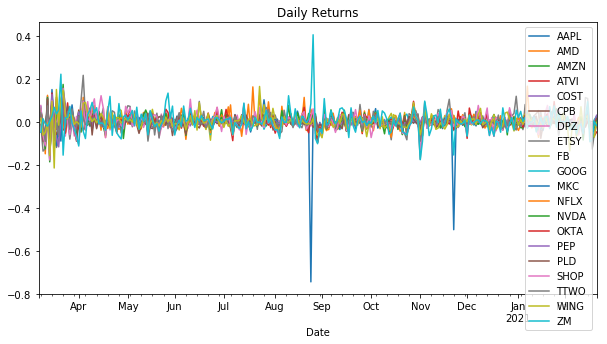

In [190]:
daily_returns.plot(figsize = (10,5), title = "Daily Returns")

In [179]:
cumulative_returns = (1+daily_returns).cumprod()-1
cumulative_returns.head() * 100

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM
Date,,,,,,,,,,,,,,,,,,,,
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,7.365929,4.900601,5.221638,6.218840,2.899201,2.111974,2.316660,-0.905983,5.688019,5.475459,5.296448,5.271219,6.558916,3.787219,3.134844,3.986626,7.796748,4.322235,1.886035,-4.627868
2020-03-10,3.461235,5.617198,1.089994,3.787282,-1.221153,0.567842,-1.070600,-14.170940,0.960854,0.048579,1.904497,1.028813,0.469369,-0.078356,-0.376489,-5.195473,1.106295,4.454010,-4.266988,-3.068132
2020-03-11,-6.798452,-9.835876,-6.877740,-4.556984,-7.081028,-5.040845,-6.141081,-24.717949,-8.386714,-8.288940,-8.827414,-9.652342,-11.826048,-7.644088,-11.379178,-9.760802,-9.599866,-4.814197,-8.694489,-3.762637
2020-03-12,4.498478,1.479427,-0.761107,3.279979,0.579840,-1.833034,-5.837745,-16.222222,1.198102,0.432273,-6.165288,-2.811895,-1.706053,-6.825701,-2.074529,0.064300,-6.415076,2.451023,-8.975388,-5.494505


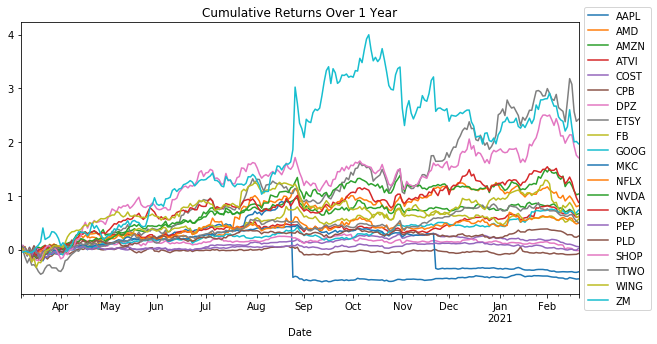

In [162]:
cumulative_returns.plot(figsize=(10,5), title = "Cumulative Returns Over 1 Year").legend(loc = "center left", bbox_to_anchor = (1.0, 0.5));

In [163]:
standard_dev = cumulative_returns.std()
standard_dev 

AAPL    0.452683
AMD     0.399846
AMZN    0.250828
ATVI    0.190681
COST    0.099133
CPB     0.041653
DPZ     0.073058
ETSY    0.901333
FB      0.223634
GOOG    0.208037
MKC     0.296077
NFLX    0.165619
NVDA    0.444898
OKTA    0.390311
PEP     0.052877
PLD     0.117297
SHOP    0.613316
TTWO    0.244940
WING    0.312962
ZM      1.088227
dtype: float64

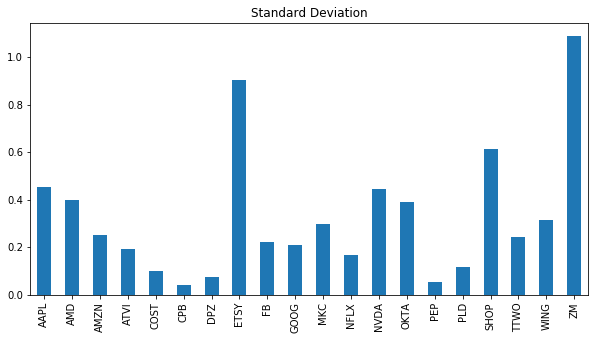

In [164]:
standard_dev.plot(kind = "bar", figsize = (10,5), title = "Standard Deviation")

In [204]:
cramer_sharpe_ratio = ( 
    daily_returns.mean() * 252 / (daily_returns.std() * np.sqrt(252))
)
cramer_sharpe_ratio

AAPL   -0.083109
AMD     1.316752
AMZN    1.547993
ATVI    1.429791
COST    0.332800
CPB    -0.080752
DPZ     0.121558
ETSY    2.015518
FB      1.225951
GOOG    1.647317
MKC    -0.432099
NFLX    1.067054
NVDA    1.543451
OKTA    1.494176
PEP     0.242742
PLD     0.740344
SHOP    1.827190
TTWO    1.213619
WING    1.090465
ZM      1.686673
dtype: float64

In [165]:
snp500_data = Path("snp_data_5Y.csv")
snp500_df = pd.read_csv(snp500_data, index_col = "Date", infer_datetime_format = True, parse_dates = True)
snp500 = snp500_df.drop(columns=["High", "Open", "Low", "Volume"])
snp500.columns = ["S&P 500"]
snp500

,S&P 500
Date,
2021-05-28,4204.11
2021-05-27,4200.88
2021-05-26,4195.99
2021-05-25,4188.13
2021-05-24,4197.05
2021-05-21,4155.86
2021-05-20,4159.12
2021-05-19,4115.68
2021-05-18,4127.83


In [166]:
snp_data_1year = snp500.iloc[59:311, :]
snp_data_1year

,S&P 500
Date,
2021-03-05,3841.94
2021-03-04,3768.47
2021-03-03,3819.72
2021-03-02,3870.29
2021-03-01,3901.82
2021-02-26,3811.15
2021-02-25,3829.34
2021-02-24,3925.43
2021-02-23,3881.37


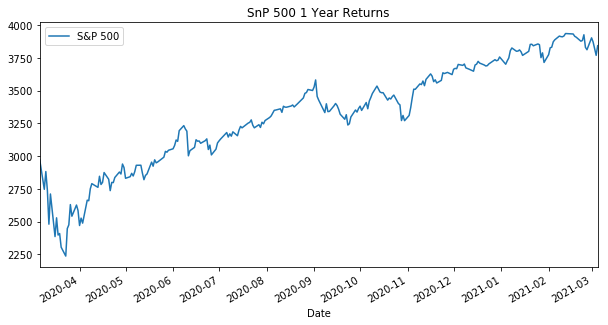

In [191]:
snp_data_1year.plot(figsize=(10,5), title="SnP 500 1 Year Returns")

In [167]:
snp_data_1year.pct_change() * 100

,S&P 500
Date,
2021-03-05,NaN
2021-03-04,-1.912315
2021-03-03,1.359968
2021-03-02,1.323919
2021-03-01,0.814668
2021-02-26,-2.323787
2021-02-25,0.477284
2021-02-24,2.509310
2021-02-23,-1.122425


In [203]:
snp500_sharpe_ratio = (
    snp_data_1year.mean() / (snp_data_1year.std() * np.sqrt(252))
)

snp500_sharpe_ratio

S&P 500    0.527627
dtype: float64

In [168]:
combined_df = pd.concat([cramer_stocks, snp_data_1year], axis = "columns", join = "inner")
combined_df

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,...,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-06,266.0900,43.2600,1800.010,57.1650,300.945,50.190,336.26,58.5000,168.6000,1214.51,...,346.0300,245.010,114.86,130.1500,77.760,417.6100,113.83,74.7600,113.7500,2972.37
2020-03-09,285.6900,45.3800,1894.000,60.7200,309.670,51.250,344.05,57.9700,178.1900,1281.01,...,364.2700,261.080,119.21,134.2300,80.860,450.1700,118.75,76.1700,108.4858,2746.56
2020-03-10,275.3000,45.6900,1819.630,59.3300,297.270,50.475,332.66,50.2100,170.2200,1215.10,...,349.5900,246.160,114.77,129.6600,73.720,422.2300,118.90,71.5700,110.2600,2882.23
2020-03-11,248.0000,39.0050,1676.210,54.5600,279.635,47.660,315.61,44.0400,154.4600,1113.84,...,312.6300,216.035,106.08,115.3400,70.170,377.5200,108.35,68.2600,109.4700,2741.38
2020-03-12,278.0600,43.9000,1786.310,59.0400,302.690,49.270,316.63,49.0100,170.6200,1219.76,...,336.3000,240.830,107.02,127.4500,77.810,390.8200,116.62,68.0500,107.5000,2480.64
2020-03-13,241.4700,38.7100,1688.000,52.7600,283.180,49.300,285.75,41.6500,145.9600,1085.00,...,296.8400,196.590,96.11,113.0700,64.370,322.2900,108.00,57.5200,107.9800,2711.02
2020-03-16,252.8500,41.8800,1807.380,56.1600,307.000,53.840,298.67,42.1150,149.4200,1119.79,...,319.7401,217.260,109.18,127.7200,70.700,354.9800,116.46,63.1200,111.0400,2386.13
2020-03-17,249.0000,39.1300,1832.390,55.7500,307.550,50.490,291.53,39.2500,147.0500,1098.64,...,317.3300,203.510,102.06,126.6000,67.840,336.5700,106.62,49.7100,118.8002,2529.19
2020-03-18,244.7800,39.7900,1880.500,54.1163,305.220,47.500,323.15,34.6600,153.0300,1115.06,...,331.8850,212.970,113.96,117.3400,64.060,332.4901,106.33,57.2900,123.3800,2398.10


In [169]:
price_correlation = combined_df.corr()
price_correlation

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,...,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM,S&P 500
AAPL,1.000000,-0.525077,-0.303372,-0.318705,-0.615018,0.570695,-0.017818,-0.498403,-0.361139,-0.475524,...,-0.340315,-0.549709,-0.437193,-0.323332,-0.231164,-0.333505,-0.433560,0.048922,-0.691062,-0.503565
AMD,-0.525077,1.000000,0.879178,0.820373,0.898857,-0.156449,0.570167,0.867934,0.868148,0.812776,...,0.838405,0.937384,0.867013,0.766779,0.794413,0.851213,0.933441,0.705805,0.818300,0.895352
AMZN,-0.303372,0.879178,1.000000,0.850080,0.818431,-0.019965,0.749003,0.800788,0.950551,0.779822,...,0.941813,0.940036,0.885192,0.746985,0.909584,0.911804,0.863066,0.852315,0.824558,0.865192
ATVI,-0.318705,0.820373,0.850080,1.000000,0.639626,-0.144900,0.498439,0.940484,0.796262,0.902704,...,0.912828,0.852759,0.939424,0.611107,0.790947,0.966010,0.927439,0.819273,0.660438,0.908350
COST,-0.615018,0.898857,0.818431,0.639626,1.000000,-0.116723,0.566981,0.733796,0.831510,0.706674,...,0.740116,0.892097,0.773972,0.813672,0.722106,0.714106,0.799737,0.515514,0.877662,0.786932
CPB,0.570695,-0.156449,-0.019965,-0.144900,-0.116723,1.000000,0.244918,-0.257268,-0.027213,-0.218308,...,-0.061453,-0.197820,-0.168898,0.217658,0.032362,-0.124037,-0.178460,0.192037,-0.296886,-0.213833
DPZ,-0.017818,0.570167,0.749003,0.498439,0.566981,0.244918,1.000000,0.362969,0.730284,0.324736,...,0.659861,0.646163,0.559505,0.637303,0.735268,0.584066,0.498982,0.745704,0.602692,0.466408
ETSY,-0.498403,0.867934,0.800788,0.940484,0.733796,-0.257268,0.362969,1.000000,0.764655,0.938570,...,0.861417,0.871588,0.943492,0.614887,0.722317,0.931614,0.948810,0.677723,0.723784,0.940496
FB,-0.361139,0.868148,0.950551,0.796262,0.831510,-0.027213,0.730284,0.764655,1.000000,0.790887,...,0.878298,0.938411,0.862678,0.762339,0.878731,0.868524,0.827618,0.794829,0.829843,0.864909
GOOG,-0.475524,0.812776,0.779822,0.902704,0.706674,-0.218308,0.324736,0.938570,0.790887,1.000000,...,0.832137,0.854598,0.907232,0.607137,0.728803,0.894216,0.879364,0.644372,0.674206,0.932487


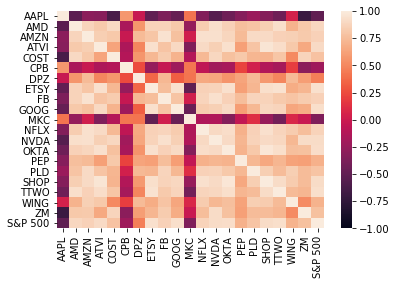

In [170]:
sns.heatmap(price_correlation, vmin = -1, vmax = 1)

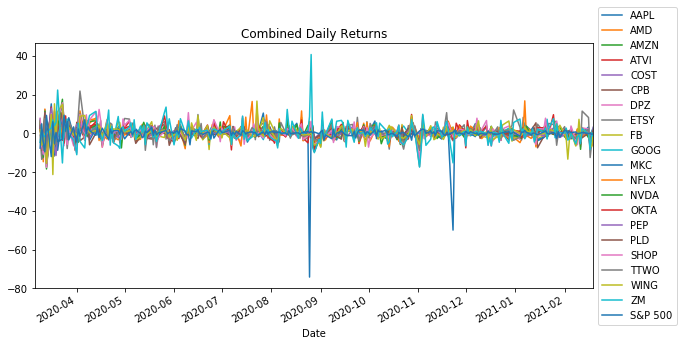

In [171]:
combined_daily_returns = (combined_df.pct_change()) * 100
combined_daily_returns.plot(figsize = (10,5), title = "Combined Daily Returns").legend(loc = "center left", bbox_to_anchor = (1.0, 0.5));

In [172]:
correlation = combined_daily_returns.corr()
correlation

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,...,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM,S&P 500
AAPL,1.000000,0.234146,0.332805,0.285496,0.339584,0.157364,0.250986,0.264406,0.393373,0.381157,...,0.258255,0.366581,0.174554,0.332276,0.333876,0.235605,0.281191,0.219587,-0.034313,-0.153780
AMD,0.234146,1.000000,0.589272,0.549916,0.562797,0.274385,0.456981,0.444316,0.539905,0.546676,...,0.505828,0.767823,0.513708,0.507186,0.494647,0.575653,0.614396,0.499217,0.188168,-0.279673
AMZN,0.332805,0.589272,1.000000,0.629171,0.604967,0.271681,0.452094,0.449517,0.683380,0.649158,...,0.708826,0.653291,0.566405,0.482196,0.453368,0.543295,0.589532,0.358321,0.280277,-0.241461
ATVI,0.285496,0.549916,0.629171,1.000000,0.588275,0.339031,0.418100,0.465248,0.508631,0.535692,...,0.637827,0.599226,0.503282,0.548212,0.454079,0.513608,0.736969,0.328621,0.311900,-0.278986
COST,0.339584,0.562797,0.604967,0.588275,1.000000,0.402074,0.422439,0.418556,0.554801,0.605494,...,0.537851,0.659194,0.394191,0.706770,0.562297,0.415159,0.570451,0.257538,0.115431,-0.365684
CPB,0.157364,0.274385,0.271681,0.339031,0.402074,1.000000,0.207565,0.195322,0.241319,0.241418,...,0.228468,0.294674,0.274566,0.499088,0.293165,0.164233,0.336490,0.154382,0.023010,-0.191819
DPZ,0.250986,0.456981,0.452094,0.418100,0.422439,0.207565,1.000000,0.358373,0.424418,0.390734,...,0.443738,0.530366,0.481442,0.374321,0.314750,0.435406,0.477883,0.524174,0.198664,-0.335494
ETSY,0.264406,0.444316,0.449517,0.465248,0.418556,0.195322,0.358373,1.000000,0.370482,0.399447,...,0.404796,0.529764,0.509758,0.448996,0.463423,0.670516,0.486661,0.487675,0.292276,-0.129250
FB,0.393373,0.539905,0.683380,0.508631,0.554801,0.241319,0.424418,0.370482,1.000000,0.780462,...,0.552482,0.666408,0.431881,0.547593,0.572491,0.487092,0.485524,0.408009,0.032748,-0.305252
GOOG,0.381157,0.546676,0.649158,0.535692,0.605494,0.241418,0.390734,0.399447,0.780462,1.000000,...,0.530982,0.705268,0.421704,0.615873,0.617990,0.454109,0.453380,0.374767,0.003376,-0.327698


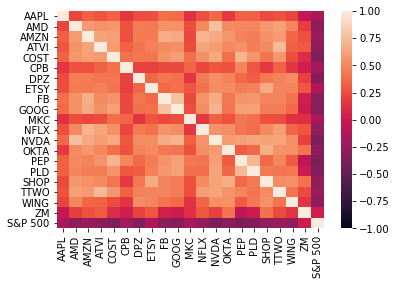

In [173]:
sns.heatmap(correlation, vmin = -1, vmax = 1)

In [174]:
AAPLcovariance = combined_daily_returns["AAPL"].cov(combined_daily_returns["S&P 500"])
AMDcovariance = combined_daily_returns["AMD"].cov(combined_daily_returns["S&P 500"])
AMZNcovariance = combined_daily_returns["AMZN"].cov(combined_daily_returns["S&P 500"])
ATVIcovariance = combined_daily_returns["ATVI"].cov(combined_daily_returns["S&P 500"])
COSTcovariance = combined_daily_returns["COST"].cov(combined_daily_returns["S&P 500"])
CPBcovariance = combined_daily_returns["CPB"].cov(combined_daily_returns["S&P 500"])
DPZcovariance = combined_daily_returns["DPZ"].cov(combined_daily_returns["S&P 500"])
ETSYcovariance = combined_daily_returns["ETSY"].cov(combined_daily_returns["S&P 500"])
FBcovariance = combined_daily_returns["FB"].cov(combined_daily_returns["S&P 500"])
GOOGcovariance = combined_daily_returns["GOOG"].cov(combined_daily_returns["S&P 500"])
MKCcovariance = combined_daily_returns["MKC"].cov(combined_daily_returns["S&P 500"])
NFLXcovariance = combined_daily_returns["NFLX"].cov(combined_daily_returns["S&P 500"])
NVDAcovariance = combined_daily_returns["NVDA"].cov(combined_daily_returns["S&P 500"])
OKTAcovariance = combined_daily_returns["OKTA"].cov(combined_daily_returns["S&P 500"])
PEPcovariance = combined_daily_returns["PEP"].cov(combined_daily_returns["S&P 500"])
PLDcovariance = combined_daily_returns["PLD"].cov(combined_daily_returns["S&P 500"])
SHOPcovariance = combined_daily_returns["SHOP"].cov(combined_daily_returns["S&P 500"])
TTWOcovariance = combined_daily_returns["TTWO"].cov(combined_daily_returns["S&P 500"])
WINGcovariance = combined_daily_returns["WING"].cov(combined_daily_returns["S&P 500"])
ZMcovariance = combined_daily_returns["ZM"].cov(combined_daily_returns["S&P 500"])

In [175]:
AAPLvariance = combined_daily_returns["AAPL"].var()
AMDvariance = combined_daily_returns["AMD"].var()
AMZNvariance = combined_daily_returns["AMZN"].var()
ATVIvariance = combined_daily_returns["ATVI"].var()
COSTvariance = combined_daily_returns["COST"].var()
CPBvariance = combined_daily_returns["CPB"].var()
DPZvariance = combined_daily_returns["DPZ"].var()
ETSYvariance = combined_daily_returns["ETSY"].var()
FBvariance = combined_daily_returns["FB"].var()
GOOGvariance = combined_daily_returns["GOOG"].var()
MKCvariance = combined_daily_returns["MKC"].var()
NFLXvariance = combined_daily_returns["NFLX"].var()
NVDAvariance = combined_daily_returns["NVDA"].var()
OKTAvariance = combined_daily_returns["OKTA"].var()
PEPvariance = combined_daily_returns["PEP"].var()
PLDvariance = combined_daily_returns["PLD"].var()
SHOPvariance = combined_daily_returns["SHOP"].var()
TTWOvariance = combined_daily_returns["TTWO"].var()
WINGvariance = combined_daily_returns["WING"].var()
ZMvariance = combined_daily_returns["ZM"].var()

In [176]:
AAPLbeta = AAPLcovariance / AAPLvariance
print(f"AAPL Beta is {AAPLbeta}")

AMDbeta = AMDcovariance / AMDvariance
print(f"AMD Beta is {AMDbeta}")

AMZNbeta = AMZNcovariance / AMZNvariance
print(f"AMZN Beta is {AMZNbeta}")

ATVIbeta = ATVIcovariance / ATVIvariance
print(f"ATVI Beta is {ATVIbeta}")

COSTbeta = COSTcovariance / COSTvariance
print(f"COST Beta is {COSTbeta}")

CPBbeta = CPBcovariance / CPBvariance
print(f"CPB Beta is {CPBbeta}")

DPZbeta = DPZcovariance / DPZvariance
print(f"DPZ Beta is {DPZbeta}")

ETSYbeta = ETSYcovariance / ETSYvariance
print(f"ETSY Beta is {ETSYbeta}")

FBbeta = FBcovariance / FBvariance
print(f"FB Beta is {FBbeta}")

GOOGbeta = GOOGcovariance / GOOGvariance
print(f"GOOG Beta is {GOOGbeta}")

MKCbeta = MKCcovariance / MKCvariance
print(f"MKC Beta is {MKCbeta}")

NVDAbeta = NVDAcovariance / NVDAvariance
print(f"NVDA Beta is {NVDAbeta}")

OKTAbeta = OKTAcovariance / OKTAvariance
print(f"OKTA Beta is {OKTAbeta}")

PEPbeta = PEPcovariance / PEPvariance
print(f"PEP Beta is {PEPbeta}")

PLDbeta = PLDcovariance / PLDvariance
print(f"PLD Beta is {PLDbeta}")

SHOPbeta = SHOPcovariance / SHOPvariance
print(f"SHOP Beta is {SHOPbeta}")

TTWObeta = TTWOcovariance / TTWOvariance
print(f"TTWO Beta is {TTWObeta}")

WINGbeta = WINGcovariance / WINGvariance
print(f"WING Beta is {WINGbeta}")

ZMbeta = ZMcovariance / ZMvariance
print(f"ZM Beta is {ZMbeta}")

AAPL Beta is -0.05881743596573781
AMD Beta is -0.16086128310577003
AMZN Beta is -0.21205625779377485
ATVI Beta is -0.23474796417117966
COST Beta is -0.46304637153775485
CPB Beta is -0.19935860110131143
DPZ Beta is -0.3224775826001876
ETSY Beta is -0.0569850198788584
FB Beta is -0.22547720208602037
GOOG Beta is -0.2870174299244948
MKC Beta is -0.08677292405921108
NVDA Beta is -0.22183103359638517
OKTA Beta is -0.1923763036571865
PEP Beta is -0.3459416520176575
PLD Beta is -0.27429927912838037
SHOP Beta is -0.12955048423154503
TTWO Beta is -0.1933413171583075
WING Beta is -0.15519140095502634
ZM Beta is 0.0032697100242974585
